In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
dataset = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [4]:
df = dataset.copy()

In [21]:
df.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."


In [31]:
def cat_info(cat):
    info = {'Date':'Date of accident, in the format - January 01, 2001',
           'Time':'Local time, in 24 hr. format unless otherwise specified',
           'Location':'Location of the accident',
           'Operator':'Airline or operator of the aircraft',
           'Flight #':'Flight number assigned by the aircraft operator',
           'Route':'Complete or partial route flown prior to the accident',
           'Type':'Aircraft type',
           'Registration':'ICAO registration of the aircraft',
           'cn/In':'Construction or serial number / Line or fuselage number',
           'Aboard':'Total aboard (passengers / crew)',
           'Fatalities':'Number of Fatalities',
           'Ground':'Unknown',
           'Summary':'Description of the accident'}
    
    print (info[cat])

In [32]:
cat_info('cn/In')

Construction or serial number / Line or fuselage number


In [11]:
pd.to_datetime('09/17/1908').date()

datetime.date(1908, 9, 17)

In [12]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x).date())

## Questions to answer
   1. Yearly how many planes crashed? how many people were on board? how many survived? how many died?
   2. Highest number of crashes by operator and Type of aircrafts.
   3. ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
   4. Find the number of crashed aircrafts and number of deaths against each category from above step.
   5. Find any interesting trends/behaviors that you encounter when you analyze the dataset.

In [17]:
from pandas_profiling import ProfileReport

In [19]:
profile = ProfileReport(df,title='Airplane Crash Data')

In [20]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
#sns.heatmap(df.isnull())

<AxesSubplot:>

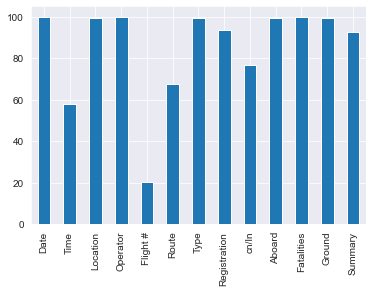

In [48]:
round(abs(df.isnull().sum()/len(df)*100-100),1).plot(kind='bar')

In [60]:
df['Military_or_Not'] = df['Operator'].apply(lambda x: 'Military' if 'Military' in str(x) else 'Non_Military')

<AxesSubplot:xlabel='Military_or_Not', ylabel='count'>

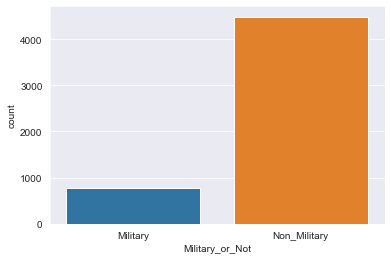

In [62]:
sns.countplot(data=df,x='Military_or_Not')

In [64]:
df['Type'].value_counts()

Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
                                           ... 
Boeing 727-21                                 1
NAMC-YS-11-111                                1
Lockheed EC-121H                              1
Cessna 205A                                   1
Airbus A330-203                               1
Name: Type, Length: 2446, dtype: int64

In [68]:
df[df['Type']=='Douglas DC-3']['Military_or_Not'].value_counts()

Non_Military    333
Military          1
Name: Military_or_Not, dtype: int64

In [108]:
df['Survived'] = df['Aboard'] - df['Fatalities']

In [ ]:
df['Year'] = df['Date'].apply(lambda x: x.year)

### Number of Crashes Per Year

Text(80.125, 0.5, 'Number of Crashes')

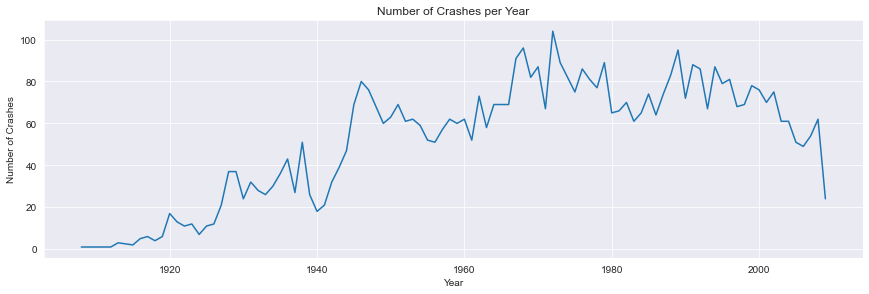

In [103]:
plt.figure(figsize=(12,4))
df.groupby('Year')['Date'].count().plot()
plt.tight_layout()
plt.title('Number of Crashes per Year')
plt.ylabel('Number of Crashes')

#df.groupby('Year')['Aboard'].sum().plot(kind='bar')

### Num of people aboard per year

Text(0.5, 1.0, 'Total Num of Passengers per Year')

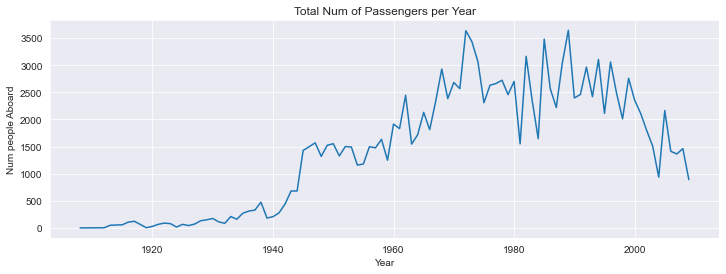

In [156]:
plt.figure(figsize=(12,4))
df.groupby('Year')['Aboard'].sum().plot()
plt.ylabel('Num people Aboard')
plt.title('Total Num of Passengers per Year')

Text(0, 0.5, 'Num of Fatalities')

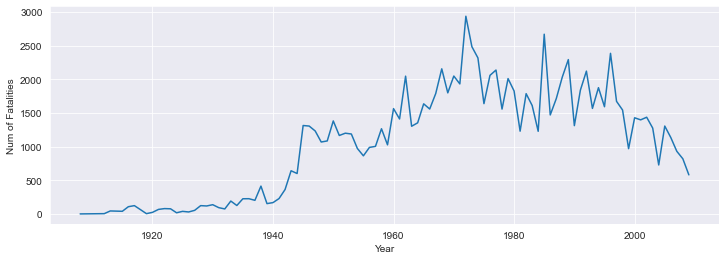

In [122]:
plt.figure(figsize=(12,4))
df.groupby('Year')['Fatalities'].sum().plot()
plt.ylabel('Num of Fatalities')

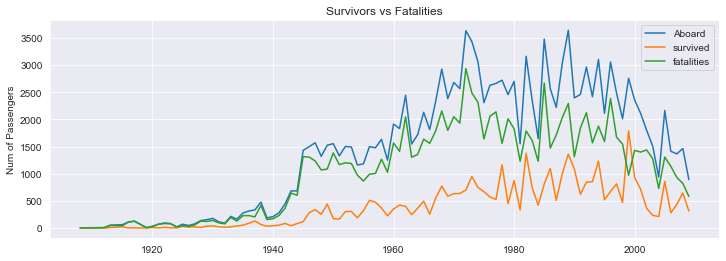

In [142]:
aboard = df.groupby('Year')['Aboard'].sum()
survived = df.groupby('Year')['Survived'].sum()
fatalities = df.groupby('Year')['Fatalities'].sum()


plt.figure(figsize=(12,4))
plt.plot(aboard)
plt.plot(survived)
plt.plot(fatalities)
plt.title('Survivors vs Fatalities')
plt.ylabel('Num of Passengers')
plt.legend(['Aboard','survived', 'fatalities'])

In [111]:
df.groupby('Year')['Survived'].sum()

Year
1908      1.0
1912      0.0
1913      6.0
1915     20.0
1916      1.0
        ...  
2005    858.0
2006    277.0
2007    433.0
2008    643.0
2009    310.0
Name: Survived, Length: 98, dtype: float64

In [112]:
df.groupby('Year')['Fatalities'].sum()

Year
1908       1.0
1912       5.0
1913      45.0
1915      40.0
1916     108.0
         ...  
2005    1306.0
2006    1136.0
2007     931.0
2008     820.0
2009     581.0
Name: Fatalities, Length: 98, dtype: float64

In [ ]:
df.groupby('Year').sum()

### Highest num of crashes by Type of Aircraft

Text(0, 0.5, 'Num of Crashes')

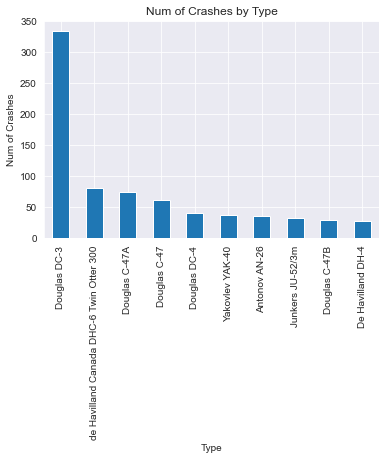

In [161]:
df.groupby('Type')['Date'].count().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Num of Crashes by Type')
plt.ylabel('Num of Crashes')



Text(0, 0.5, 'Num of Crashes')

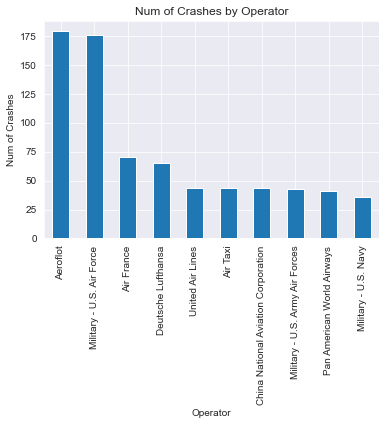

In [155]:
df.groupby('Operator')['Date'].count().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Num of Crashes by Operator')
plt.ylabel('Num of Crashes')

In [167]:
df['Summary']

0       During a demonstration flight, a U.S. Army fly...
1       First U.S. dirigible Akron exploded just offsh...
2       The first fatal airplane accident in Canada oc...
3       The airship flew into a thunderstorm and encou...
4       Hydrogen gas which was being vented was sucked...
                              ...                        
5263    While on approach, the military transport cras...
5264    The cargo plane crashed while on approach to I...
5265    The Airbus went missing over the AtlantiOcean ...
5266    The air ambulance crashed into hills while att...
5267    The military transport went missing while en r...
Name: Summary, Length: 5268, dtype: object

In [250]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Military_or_Not,Year,Survived,Crash Type,Survival Rate
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908,1.0,Unknown,0.5
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912,0.0,Unknown,0.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Non_Military,1913,0.0,Weather,0.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913,6.0,Weather,0.3
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913,0.0,Mecahnical,0.0


In [222]:
def type_crash(summary):
    weather_list = ['storm','lightning','weather','air pocket','ice','fog','visibility']
    pilot_list = ['pilot error', 'criminal', 'mistake', 'error', 'lost']
    shot_down_list = ['shot down', 'attack', 'enemy']
    fire_list = ['fire', 'explosion', 'flame', 'smoke']
    missing_list = ['missing', 'disappear']
    bird_list = ['bird', 'seagull', 'flock']
    mechanical = ['mechanic','engine','lost power','controls']
    
    for i in weather_list:
        if i in str(summary).lower():
            return 'Weather'
  
    for i in pilot_list:
        if i in str(summary).lower():
            return 'Pilot Error'
    
    for i in shot_down_list:
        if i in str(summary).lower():
            return 'Shot Down'

    for i in fire_list:
        if i in str(summary).lower():
            return 'Fire'
  
    for i in missing_list:
        if i in str(summary).lower():
            return 'Missing'
    
    for i in bird_list:
        if i in str(summary).lower():
            return 'Bird Strike'
        
    for i in mechanical:
        if i in str(summary).lower():
            return 'Mecahnical'
    
    
    

In [223]:
df['Crash Type'] = df['Summary'].apply(type_crash)

In [227]:
df['Crash Type'].fillna('Unknown', inplace = True)

In [228]:
df['Crash Type'].value_counts()

Unknown        2494
Weather        1337
Pilot Error     420
Mecahnical      397
Fire            384
Shot Down       139
Missing          89
Bird Strike       8
Name: Crash Type, dtype: int64

Text(0, 0.5, 'Num of Survivors/Fatalities')

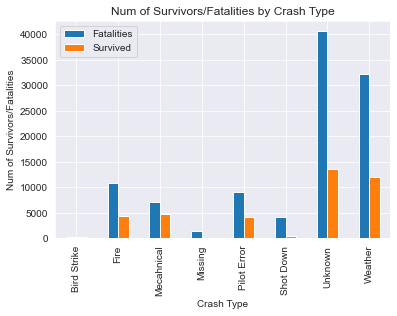

In [240]:
fat_sur = ['Fatalities','Survived']
df.groupby('Crash Type')[fat_sur].sum().plot(kind='bar')
plt.title('Num of Survivors/Fatalities by Crash Type')
plt.ylabel('Num of Survivors/Fatalities')

Text(0.5, 1.0, 'Num of Crashes by Type')

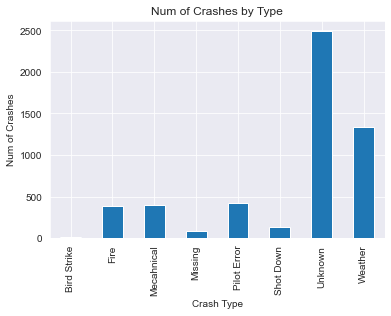

In [239]:
df.groupby('Crash Type')['Date'].count().plot(kind='bar')
plt.ylabel('Num of Crashes')
plt.title('Num of Crashes by Type')

In [242]:
df['Survival Rate'] = df['Survived'] / df['Aboard']

In [256]:
df2 = df.drop([0])

Text(0.5, 1.0, 'Ave Survival Rate by Year')

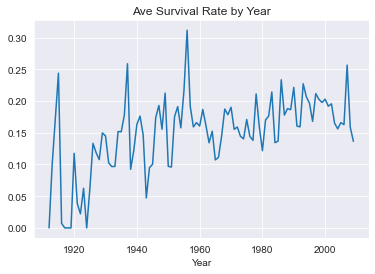

In [262]:
df2.groupby("Year")['Survival Rate'].mean().plot()
plt.title('Ave Survival Rate by Year')
